In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

## Purpose

Our purpose is to understand the effects of the `concentration grant` on academic performance. 

## Structure
The general structure of the dataset is as follows:

- county<br>
    58 in the state - top level deliniator
    
    
- county    
    - school district<br>
    Within each county, a number of school districts. We have demographic profiles of each district that we can use in the matching process, if applicable
    
    
- county    
    - school district    
        - student group<br>
        Further, the grade data breaks down into 17 student groups per district. Using this we can query academic performance by a specific group.
        
        
- county    
    - school district    
        - student group
            - math grades
            - english grades<br>
            Finally, the specific math and english grades lie at the bottom of the data structure. 

In [3]:
gdf

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,...,total_gran,District C,studentgro,e_currstat,e_priorsta,e_change,m_currstat,m_priorsta,m_change,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,...,"82,158,116",11190,None,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,...,"31,352,540",11270,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,...,"89,369,621",11430,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13609481.010 4565073.896, -13609481..."
3,NaN,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,...,"79,554,607",11500,None,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13581537.591 4528171.452, -13..."
4,NaN,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,...,"7,326,875",11680,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13614035.309 4555653.898, -13614035..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,13596.0,944,2018-19,0642350,5872769,58727690000000,Yuba,Wheatland Union High,High,07,...,"7,852,628",72769,pacific_islander,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13503989.762 4753344.067, -13503964..."
12487,13597.0,944,2018-19,0642350,5872769,58727690000000,Yuba,Wheatland Union High,High,07,...,"7,852,628",72769,rfep_only,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13503989.762 4753344.067, -13503964..."
12488,13598.0,944,2018-19,0642350,5872769,58727690000000,Yuba,Wheatland Union High,High,07,...,"7,852,628",72769,ses_disad,-28.4,-7.9,-20.6,-90.0,-74.0,-16.0,"POLYGON ((-13503989.762 4753344.067, -13503964..."
12489,13599.0,944,2018-19,0642350,5872769,58727690000000,Yuba,Wheatland Union High,High,07,...,"7,852,628",72769,disabilities,-150.3,NaN,NaN,-226.6,NaN,NaN,"POLYGON ((-13503989.762 4753344.067, -13503964..."


In [4]:
gdf.columns

Index(['index', 'OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictNa', 'DistrictTy', 'GradeLow', 'GradeHigh', 'GradeLowCe',
       'GradeHighC', 'AssistStat', 'CongressUS', 'SenateCA', 'AssemblyCA',
       'LocaleDist', 'UpdateNote', 'EnrollTota', 'EnrollChar', 'EnrollNonC',
       'AAcount', 'AApct', 'AIcount', 'AIpct', 'AScount', 'ASpct', 'FIcount',
       'FIpct', 'HIcount', 'HIpct', 'MRcount', 'MRpct', 'PIcount', 'PIpct',
       'WHcount', 'WHpct', 'NRcount', 'NRpct', 'ELcount', 'ELpct', 'FOScount',
       'FOSpct', 'HOMcount', 'HOMpct', 'MIGcount', 'MIGpct', 'SWDcount',
       'SWDpct', 'SEDcount', 'SEDpct', 'UPcount', 'UPpct', 'ELATested',
       'ELAStdMetP', 'MathTested', 'MathStdMet', 'CCPrepCoho', 'CCPrepPct',
       'AbsentElig', 'AbsentPct', 'GradCohort', 'GradPct', 'UCCSUReqMe',
       'DropOutPct', 'EnrollCumu', 'SuspPct', 'SHAPE_Leng', 'SHAPE_Area',
       'unduplicat', 'base_grant', 'supplement', 'concentrat', 'total_gran',
       'District

In [5]:
gdf.studentgro.unique()

array([None, 'all_students', 'english_learners', 'english_only',
       'foster_youth', 'hispanic', 'rfep_only', 'ses_disad',
       'disabilities', 'white', 'asian', 'english_learners_only',
       'homeless_youth', 'multiple_races', 'african_american',
       'american_indian', 'filipino', 'pacific_islander'], dtype=object)

In [6]:
gdf[gdf['studentgro'].isnull()]

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,...,total_gran,District C,studentgro,e_currstat,e_priorsta,e_change,m_currstat,m_priorsta,m_change,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,...,"82,158,116",11190,None,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,...,"31,352,540",11270,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,...,"89,369,621",11430,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13609481.010 4565073.896, -13609481..."
3,NaN,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,...,"79,554,607",11500,None,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13581537.591 4528171.452, -13..."
4,NaN,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,...,"7,326,875",11680,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13614035.309 4555653.898, -13614035..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10326,NaN,784,2018-19,0630250,4970862,49708620000000,Sonoma,Petaluma Joint Union High,High,KG,...,"44,717,056",70862,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13648857.051 4630035.082, -13647969..."
10382,NaN,789,2018-19,0635810,4970912,49709120000000,Sonoma,Santa Rosa Elementary,Elementary,KG,...,"38,433,720",70912,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13656863.038 4641197.862, -13656864..."
10383,NaN,790,2018-19,0635830,4970920,49709200000000,Sonoma,Santa Rosa High,High,05,...,"101,911,227",70920,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13656789.456 4660256.478, -13656759..."
10762,NaN,817,2018-19,0636660,5071274,50712740000000,Stanislaus,Shiloh Elementary,Elementary,KG,...,"361,423",71274,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13478206.053 4529469.576, -13478235..."


This shows that there are 92 districts that will be excluded from the academic performance analysis - the grade data are missing

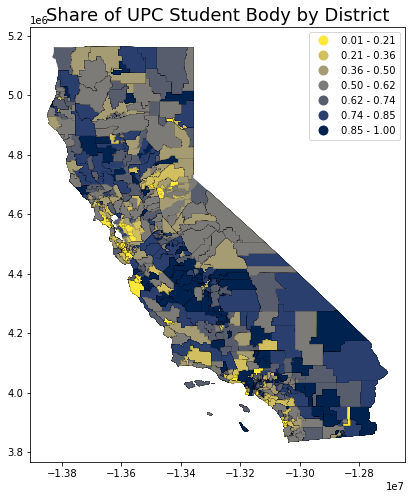

In [7]:
f, ax = plt.subplots(figsize  = (12, 8))

ax.set_title("Share of UPC Student Body by District", fontsize=18)

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

The classification scheme impacts the visualization. Rather than using a standardized scheme, it might make more sense to use a user-defined classification to better distinguish districts that recieve concentration grants from districts that do not. That determining factor is the `unduplicated pupil count` or *UPC* of students which are disadvantaged in at least one of a few defined ways. A share of UPC of 0.55 or higher means that the district recieves a concentration grant. 

A user-defined classification to capture the cutoff for reciept of a concentration grant might look like this:
- 0 -> 0.25
- 0.25 -> 0.5499
- 0.55 -> 0.70
- 0.70 -> 1.0

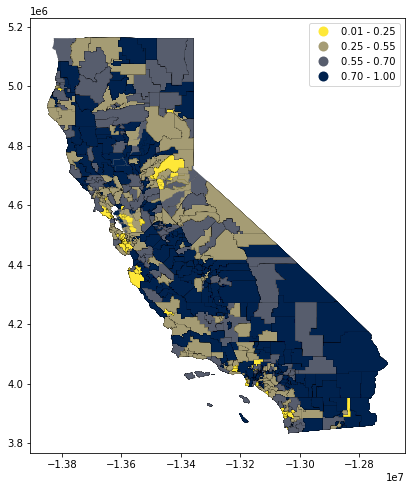

In [8]:
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

the darker polygons indicate a higher share of UPC, while the lighter districts have a lesser concentration of disadvantaged students. What happens if we further divide the top bin, the districts with the smallest share of UPC?

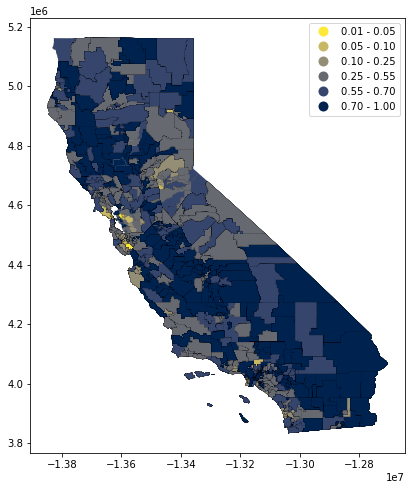

In [9]:
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.05, 0.1, 0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

This reveals that there are fewer highly priviledged/homogenized districts than the previous visualization led us to believe, but there are still some. It looks like the marjority of priviledged districts are somwhere between the `0.1` and `0.25` range of UPC.

Now lets put the original Fisher Jenks classification next to our user-defined 4-bin classification scheme.

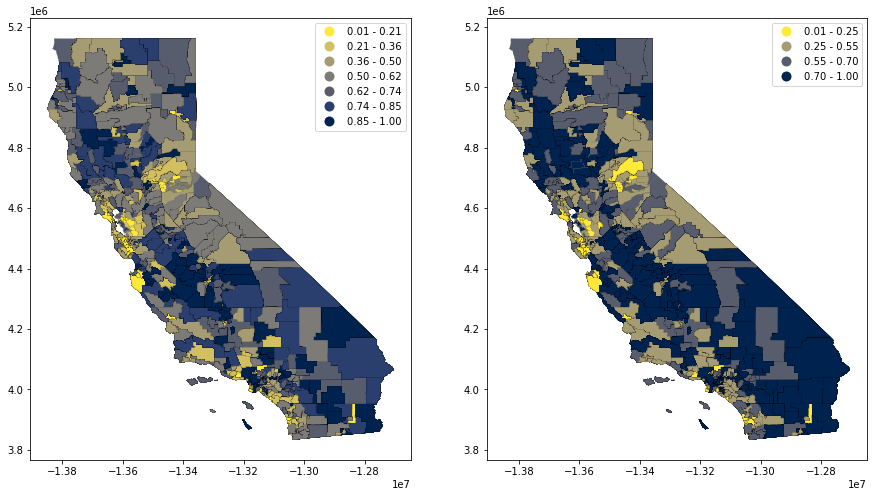

In [10]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
#ax.set_title("Share of UPC Concentration, Fisher Jenks vs User Defined Classes")
#two plots breaks title

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )

# two plots side by side PogU